In [445]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import mplfinance as mpf
from tensorflow import keras
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'


In [285]:
stock_name = "AZN"

In [297]:
def prepare_data(stock_name, period="5y", interval="1d", with_today=False,back_time=5):

    recent_data = yf.download(stock_name, period=period, interval=interval)
    data_200 = yf.download(stock_name, period="5y", interval="1d").tail(len(recent_data) + 200)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200["last_close"] = data_200["Close"].shift(1)
    data_200.fillna(method="bfill", inplace=True)

    data_200["movement"] = data_200["Close"] - data_200["Open"]

    data_200["200_day"] = data_200["Close"].rolling(window=200).mean()

    recent_data = data_200.tail(len(recent_data))
    if not with_today:
        recent_data = recent_data.iloc[:-1]

    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift(-(i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift(-(i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift(-(i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift(-(i+1))
    recent_data = recent_data.dropna()
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

prepare_data(stock_name, "1y")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\146692530.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)


,Open,High,Low,Close,Volume,last_close,movement,200_day,Open t - 1,Close t - 1,...,High t - 3,Low t - 3,Open t - 4,Close t - 4,High t - 4,Low t - 4,Open t - 5,Close t - 5,High t - 5,Low t - 5
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,70.889999,71.559998,70.830002,71.279999,4324200,70.480003,0.389999,68.75720,71.040001,70.339996,...,70.910004,69.940002,69.940002,69.510002,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998
2023-08-10,71.040001,71.510002,70.330002,70.339996,3876600,71.279999,-0.700005,68.83405,69.699997,70.370003,...,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003
2023-08-11,69.699997,70.580002,69.540001,70.370003,3549700,70.339996,0.670006,68.91000,70.029999,70.839996,...,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998
2023-08-14,70.029999,70.910004,69.940002,70.839996,3843100,70.370003,0.809998,68.98470,69.940002,69.510002,...,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997
2023-08-15,69.940002,70.120003,69.339996,69.510002,4243800,70.839996,-0.430000,69.04245,68.949997,69.709999,...,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997,68.809998,68.769997,68.970001,68.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,78.480003,79.449997,78.080002,78.129997,5878400,78.519997,-0.350006,69.79240,80.059998,78.360001,...,79.559998,78.529999,79.650002,81.199997,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002
2024-07-29,80.059998,80.120003,78.330002,78.360001,6753900,78.129997,-1.699997,69.84415,78.699997,77.900002,...,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002
2024-07-30,78.699997,78.989998,77.470001,77.900002,6480800,78.360001,-0.799995,69.89360,79.129997,79.150002,...,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002,78.250000,79.250000,79.730003,78.220001


In [298]:
recent_data = prepare_data(stock_name, "1y")
recent_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\146692530.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)


,Open,High,Low,Close,Volume,last_close,movement,200_day,Open t - 1,Close t - 1,...,High t - 3,Low t - 3,Open t - 4,Close t - 4,High t - 4,Low t - 4,Open t - 5,Close t - 5,High t - 5,Low t - 5
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,70.889999,71.559998,70.830002,71.279999,4324200,70.480003,0.389999,68.75720,71.040001,70.339996,...,70.910004,69.940002,69.940002,69.510002,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998
2023-08-10,71.040001,71.510002,70.330002,70.339996,3876600,71.279999,-0.700005,68.83405,69.699997,70.370003,...,70.120003,69.339996,68.949997,69.709999,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003
2023-08-11,69.699997,70.580002,69.540001,70.370003,3549700,70.339996,0.670006,68.91000,70.029999,70.839996,...,70.029999,68.919998,69.239998,69.120003,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998
2023-08-14,70.029999,70.910004,69.940002,70.839996,3843100,70.370003,0.809998,68.98470,69.940002,69.510002,...,69.769997,69.120003,68.370003,68.459999,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997
2023-08-15,69.940002,70.120003,69.339996,69.510002,4243800,70.839996,-0.430000,69.04245,68.949997,69.709999,...,68.779999,68.099998,68.980003,68.879997,69.139999,68.519997,68.809998,68.769997,68.970001,68.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-26,78.480003,79.449997,78.080002,78.129997,5878400,78.519997,-0.350006,69.79240,80.059998,78.360001,...,79.559998,78.529999,79.650002,81.199997,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002
2024-07-29,80.059998,80.120003,78.330002,78.360001,6753900,78.129997,-1.699997,69.84415,78.699997,77.900002,...,81.400002,79.620003,81.599998,81.809998,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002
2024-07-30,78.699997,78.989998,77.470001,77.900002,6480800,78.360001,-0.799995,69.89360,79.129997,79.150002,...,82.010002,80.830002,78.879997,79.330002,80.129997,78.690002,78.250000,79.250000,79.730003,78.220001


In [299]:
X = recent_data.drop(columns=["Close", "movement","Volume"])
print(X)
y = recent_data["movement"]

train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)

input_shape = [5]



early_stopping = callbacks.EarlyStopping(

    min_delta=0.0001, # minimium amount of change to count as an improvement

    patience=40, # how many epochs to wait before stopping

    restore_best_weights=True,
)



model = keras.Sequential(
    [

        layers.Dense(128, activation="relu", input_shape=input_shape),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),

        layers.Dense(1),

    ]
)



optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(


    optimizer=optimizer,
    loss="mse",
)
EPOCHS = 100
history = model.fit(

    train_X, train_y,

    validation_data=(val_X, val_y),

    batch_size=64,

    epochs=EPOCHS,

    callbacks=[early_stopping],

    verbose=0,
    
)

                 Open       High        Low  last_close   200_day  Open t - 1  \
Date                                                                            
2023-08-09  70.889999  71.559998  70.830002   70.480003  68.75720   71.040001   
2023-08-10  71.040001  71.510002  70.330002   71.279999  68.83405   69.699997   
2023-08-11  69.699997  70.580002  69.540001   70.339996  68.91000   70.029999   
2023-08-14  70.029999  70.910004  69.940002   70.370003  68.98470   69.940002   
2023-08-15  69.940002  70.120003  69.339996   70.839996  69.04245   68.949997   
...               ...        ...        ...         ...       ...         ...   
2024-07-26  78.480003  79.449997  78.080002   78.519997  69.79240   80.059998   
2024-07-29  80.059998  80.120003  78.330002   78.129997  69.84415   78.699997   
2024-07-30  78.699997  78.989998  77.470001   78.360001  69.89360   79.129997   
2024-07-31  79.129997  79.559998  78.529999   77.900002  69.94880   79.650002   
2024-08-01  79.650002  81.40

NameError: name 'callbacks' is not defined

In [8]:
check_data = prepare_data(stock_name, "5d", "1d", True)

print(check_data)
check_X = check_data.drop(columns=["Close","Volume", "movement"])
# print(checl_data.head())
print(check_X.tail(1))

print(model.predict(check_X.tail(1)))
print(check_X.tail(1).Open[0] + model.predict(check_X.tail(1))[0])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low  last_close   200_day
Date                                                                
2024-08-07  206.899994  213.639999  206.389999  207.229996  190.0109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.01630338]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[206.91629]



C:\Users\USER\AppData\Local\Temp\ipykernel_19432\2875853402.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19432\62514165.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(check_X.tail(1).Open[0] + model.predict(check_X.tail(1))[0])


Minimum validation loss: 0.35956647992134094


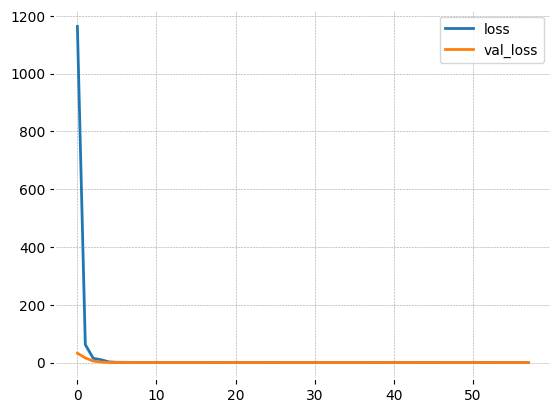

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [9]:
recent_data.head()


,Open,High,Low,Close,Volume,last_close,movement,200_day
Date,,,,,,,,
2023-08-09,180.869995,180.929993,177.009995,178.190002,60378500,179.800003,-2.679993,160.5426
2023-08-10,179.479996,180.750000,177.600006,177.970001,54686900,178.190002,-1.509995,160.6961
2023-08-11,177.320007,178.619995,176.550003,177.789993,51988100,177.970001,0.469986,160.8378
2023-08-14,177.970001,179.690002,177.309998,179.460007,43675600,177.789993,1.490005,160.9734
2023-08-15,178.880005,179.479996,177.050003,177.449997,43622600,179.460007,-1.430008,161.1139


In [451]:
stock_name = "AAPL"

In [473]:
def prepare_data(stock_name, period="1y", interval="1d",back_time=5):

    recent_data = yf.download(stock_name, period=period, interval=interval)
    data_200 = yf.download(stock_name, period=period, interval=interval).tail(len(recent_data) + 200)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200["last_close"] = data_200["Close"].shift(1)
    data_200.fillna(method="bfill", inplace=True)

    data_200["movement"] = data_200["Close"] - data_200["Open"]

    recent_data = data_200.tail(len(recent_data))

    recent_data = recent_data.iloc[:-1]

    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift((i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift((i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift((i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift((i+1))
    recent_data = recent_data.dropna()

       
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

recent_data = prepare_data(stock_name,back_time=10)

recent_data.head()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\2374190073.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)


,Open,High,Low,Close,Volume,last_close,movement,Open t - 1,Close t - 1,High t - 1,...,High t - 8,Low t - 8,Open t - 9,Close t - 9,High t - 9,Low t - 9,Open t - 10,Close t - 10,High t - 10,Low t - 10
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-23,178.520004,181.550003,178.330002,181.119995,52722800,177.229996,2.599991,177.059998,177.229996,177.679993,...,178.619995,176.550003,179.479996,177.970001,180.750000,177.600006,180.869995,178.190002,180.929993,177.009995
2023-08-24,180.669998,181.100006,176.009995,176.380005,54945800,181.119995,-4.289993,178.520004,181.119995,181.550003,...,179.690002,177.309998,177.320007,177.789993,178.619995,176.550003,179.479996,177.970001,180.750000,177.600006
2023-08-25,177.380005,179.149994,175.820007,178.610001,51449600,176.380005,1.229996,180.669998,176.380005,181.100006,...,179.479996,177.050003,177.970001,179.460007,179.690002,177.309998,177.320007,177.789993,178.619995,176.550003
2023-08-28,180.089996,180.589996,178.550003,180.190002,43820700,178.610001,0.100006,177.380005,178.610001,179.149994,...,178.539993,176.500000,178.880005,177.449997,179.479996,177.050003,177.970001,179.460007,179.690002,177.309998
2023-08-29,179.699997,184.899994,179.500000,184.119995,53003900,180.190002,4.419998,180.089996,180.190002,180.589996,...,177.509995,173.479996,177.130005,176.570007,178.539993,176.500000,178.880005,177.449997,179.479996,177.050003


27

In [474]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn

X = recent_data.drop(["Close","movement","Volume"],axis=1)
y = recent_data["movement"]

X_tensor = torch.from_numpy(X.values)
y_tensor = torch.from_numpy(y.values)




X_train,X_test,y_train,y_test = train_test_split(X_tensor,y_tensor,test_size=0.2)
X_train = X_train.to(torch.float32)
X_test= X_test.to(torch.float32)
y_train = y_train.to(torch.float32)
y_test =y_test.to(torch.float32)



In [476]:
input_shape = recent_data.shape[1]-3



class StockEstModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=input_shape,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=5),
        
            nn.Linear(in_features=5,out_features=1)
        )
    
    def forward(self,x):
        
        return self.layers(x)
model = StockEstModel()
print(X_train.dtype)


torch.float32


In [477]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)

C:\Users\USER\AppData\Local\Temp\ipykernel_29064\2487574212.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load("model1.pt")


In [478]:
epochs = 10000


for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred,y_test)
        if epoch%1000==0:
            print(f"epoch: {epoch} loss = {loss}, test loss = {test_loss}")

c:\Users\USER\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([193])) that is different to the input size (torch.Size([193, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\USER\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([49])) that is different to the input size (torch.Size([49, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0 loss = 591.190185546875, test loss = 481.23907470703125
epoch: 1000 loss = 5.642084121704102, test loss = 4.700697422027588
epoch: 2000 loss = 5.626387119293213, test loss = 4.684161186218262
epoch: 3000 loss = 5.613720417022705, test loss = 4.670924663543701
epoch: 4000 loss = 5.607079982757568, test loss = 4.663589954376221
epoch: 5000 loss = 5.605358600616455, test loss = 4.660913944244385
epoch: 6000 loss = 5.605158805847168, test loss = 4.659969329833984
epoch: 7000 loss = 5.6050896644592285, test loss = 4.659397602081299
epoch: 8000 loss = 5.605058193206787, test loss = 4.66062068939209
epoch: 9000 loss = 5.605084419250488, test loss = 4.651627063751221


In [59]:
torch.save(model, "model1.pt")

In [479]:
def prepare_test_data(stock_name, period="1y", interval="1d",back_time=5):

    recent_data = yf.download(stock_name, period=period, interval=interval)
    data_200 = yf.download(stock_name, period=period, interval=interval).tail(len(recent_data) + 200)
    data_200 = data_200.drop(columns=["Adj Close"])

    data_200["last_close"] = data_200["Close"].shift(1)
    data_200.fillna(method="bfill", inplace=True)

    data_200["movement"] = data_200["Close"] - data_200["Open"]

    recent_data = data_200.tail(len(recent_data))


    for i in range(back_time):
        recent_data[f"Open t - {i+1}"] = recent_data["Open"].shift((i+1))
        recent_data[f"Close t - {i+1}"] = recent_data["Close"].shift((i+1))
        recent_data[f"High t - {i+1}"] = recent_data["High"].shift((i+1))
        recent_data[f"Low t - {i+1}"] = recent_data["Low"].shift((i+1))
    recent_data = recent_data.dropna()

       
    # add_plot = mpf.make_addplot(recent_data["200_day"], color="blue", linestyle="--")

    return recent_data

recent_data = prepare_test_data(stock_name,back_time=10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\3869869045.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)


In [480]:
check_data = prepare_test_data(interval="1d",back_time=10,period="1y",stock_name=stock_name)
check_data = check_data.iloc[[-1]]
check_X= check_data.drop(["Close","movement","Volume"],axis=1)
check_y = check_data["movement"]

check_X_tensor = torch.from_numpy(check_X.values)
check_y_tensor = torch.from_numpy(check_y.values)

check_X_tensor= check_X_tensor.to(torch.float32)
check_y_tensor= check_y_tensor.to(torch.float32)

print(check_X["Open"][0]+ model(check_X_tensor).item())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

212.12328819930553



C:\Users\USER\AppData\Local\Temp\ipykernel_29064\3869869045.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_200.fillna(method="bfill", inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_29064\2776468504.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(check_X["Open"][0]+ model(check_X_tensor).item())


In [481]:
check_X

,Open,High,Low,last_close,Open t - 1,Close t - 1,High t - 1,Low t - 1,Open t - 2,Close t - 2,...,High t - 8,Low t - 8,Open t - 9,Close t - 9,High t - 9,Low t - 9,Open t - 10,Close t - 10,High t - 10,Low t - 10
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-09,212.080002,215.735001,211.979996,213.309998,213.110001,213.309998,214.199997,208.830002,206.899994,209.820007,...,220.330002,216.119995,216.960007,218.240005,219.300003,215.75,218.699997,217.960007,219.490005,216.009995


,Open,High,Low,Close,Volume,last_close,movement,Open t - 1,Close t - 1,High t - 1,...,High t - 3,Low t - 3,Open t - 4,Close t - 4,High t - 4,Low t - 4,Open t - 5,Close t - 5,High t - 5,Low t - 5
Date,,,,,,,,,,,,,,,,,,,,,
2024-08-09,212.080002,215.735001,211.979996,215.339996,18469955,213.309998,3.259995,213.110001,213.309998,214.199997,...,209.990005,201.070007,199.089996,209.270004,213.5,196.0,219.149994,219.860001,225.600006,217.710007
